### Import Libraries

In [ ]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

In [ ]:
#loading Dataset
mnist = tf.keras.datasets.mnist.load_data()

In [ ]:
#iterate dataset
(x_train, y_train), (x_test, y_test)  = mnist

In [ ]:
print("Training samples number is: %d" % len(x_train))
print("Test samples number is: %d" % len(x_test))

Training samples number is: 60000
Test samples number is: 10000


In [ ]:
print("Calsses number of data is: %d" % len(np.bincount(y_train)))

Calsses number of data is: 10


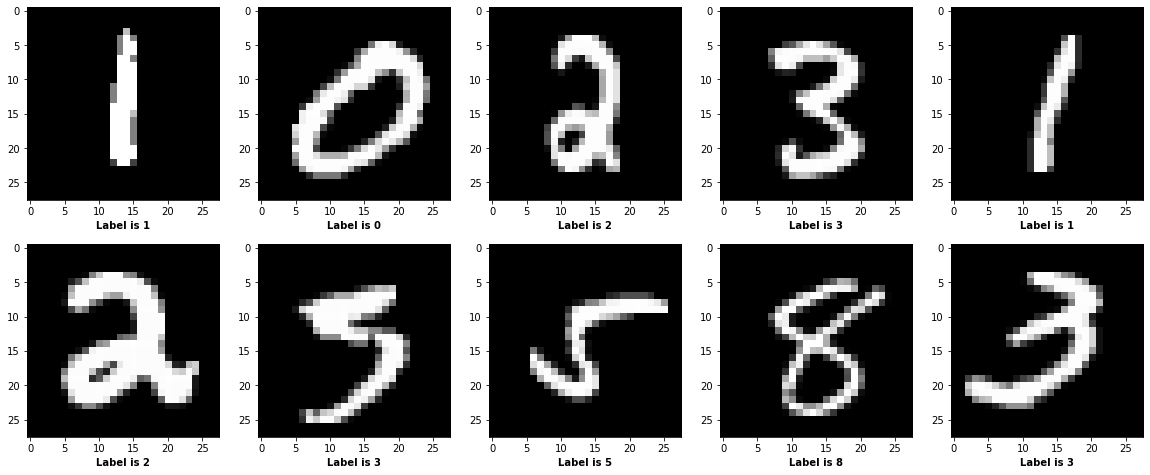

In [ ]:
fig, axes = plt.subplots(2,  5, figsize=(20, 8))
indexes = np.random.choice(len(x_train), 10)
for i in range(2):
    for j in range(5):
        axes[i, j].imshow(x_train[indexes[i*5 + j]], cmap='gray')
        axes[i, j].set_xlabel("Label is %d" % y_train[indexes[i*5 + j]], fontdict={'weight': 'bold', 'size': 10})

In [ ]:
#standar normalization preprocessing
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train])
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test])
mean = x_train.mean()
std = x_train.std()
x_train_normalized = (x_train - mean) / (std + 1e-4)
x_test_normalized = (x_test - mean) / (std + 1e-4)

In [ ]:
def create_model(**kwargs):
    model = tf.keras.Sequential([
        layers.Conv2D(kwargs['f1'], kernel_size=kwargs['k1'], strides=kwargs['s'], padding=kwargs['p'], input_shape=(48, 48, 1)),
        layers.Conv2D(kwargs['f2'], kernel_size=kwargs['k2'], strides=kwargs['s'], padding=kwargs['p']),
        layers.Conv2D(kwargs['f3'], kernel_size=kwargs['k3'], strides=kwargs['s'], padding=kwargs['p'] ),
        layers.Flatten(),
        layers.Dense(kwargs['fc'], activation='relu'),
        layers.Dense(10, activation='Softmax')
    
    ])
    return model

# model1

In [ ]:
args = {'f1': 64, 'f2': 64, 'f3': 128, 'fc': 128, 'k1': (3,3), 'k2': (3,3), 'k3': (3,3), 's': (2, 2), 'p': 'valid'}
model1 = create_model(**args)
model1.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
hist1 = model1.fit(x=x_train_normalized, y=y_train, batch_size=50, epochs=10, validation_data=(x_test_normalized, y_test))

Epoch 1/10
1200/1200 [==============================] - 16s 6ms/step - loss: 0.1979 - acc: 0.9415 - val_loss: 0.1188 - val_acc: 0.9632
Epoch 2/10
1200/1200 [==============================] - 6s 5ms/step - loss: 0.1020 - acc: 0.9691 - val_loss: 0.1104 - val_acc: 0.9665
Epoch 3/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0793 - acc: 0.9755 - val_loss: 0.0920 - val_acc: 0.9718
Epoch 4/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0679 - acc: 0.9790 - val_loss: 0.0856 - val_acc: 0.9738
Epoch 5/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0590 - acc: 0.9812 - val_loss: 0.0882 - val_acc: 0.9760
Epoch 6/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0512 - acc: 0.9833 - val_loss: 0.0843 - val_acc: 0.9760
Epoch 7/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0430 - acc: 0.9865 - val_loss: 0.0991 - val_acc: 0.9754
Epoch 8/10
1200/1200 [==============================] - 5s 4m

Text(0.5, 1.0, 'Model Accuracy')

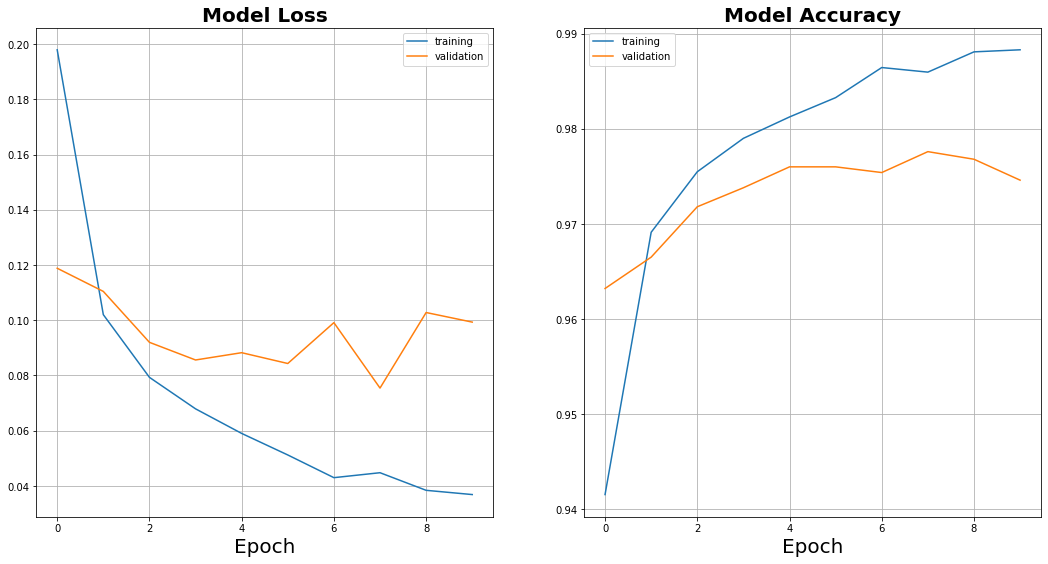

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 9))
axes[0].plot(hist1.history['loss'], label='training')
axes[0].plot(hist1.history['val_loss'], label='validation')
axes[0].legend()
axes[0].grid()
axes[0].set_xlabel('Epoch', fontdict={'size': 20})
axes[0].set_title('Model Loss', fontdict={'weight': 'bold', 'size': 20})
axes[1].plot(hist1.history['acc'], label='training')
axes[1].plot(hist1.history['val_acc'], label='validation')
axes[1].legend()
axes[1].grid()
axes[1].set_xlabel('Epoch', fontdict={'size': 20})
axes[1].set_title('Model Accuracy', fontdict={'weight': 'bold', 'size': 20})

# model 2

In [ ]:
args = {'f1': 64, 'f2': 64, 'f3': 128, 'fc': 128, 'k1': (5,5), 'k2': (3,3), 'k3': (3,3), 's': (2, 2), 'p': 'valid'}
model2 = create_model(**args)
model2.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
hist2 = model2.fit(x=x_train_normalized, y=y_train, batch_size=50, epochs=10, validation_data=(x_test_normalized, y_test))

Epoch 1/10
1200/1200 [==============================] - 6s 4ms/step - loss: 0.2018 - acc: 0.9398 - val_loss: 0.1277 - val_acc: 0.9605
Epoch 2/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.1093 - acc: 0.9664 - val_loss: 0.1170 - val_acc: 0.9648
Epoch 3/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0887 - acc: 0.9731 - val_loss: 0.1059 - val_acc: 0.9717
Epoch 4/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0807 - acc: 0.9757 - val_loss: 0.0999 - val_acc: 0.9723
Epoch 5/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0751 - acc: 0.9778 - val_loss: 0.1036 - val_acc: 0.9722
Epoch 6/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0628 - acc: 0.9813 - val_loss: 0.1093 - val_acc: 0.9702
Epoch 7/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0640 - acc: 0.9804 - val_loss: 0.0837 - val_acc: 0.9791
Epoch 8/10
1200/1200 [==============================] - 5s 4ms

Text(0.5, 1.0, 'Model Accuracy')

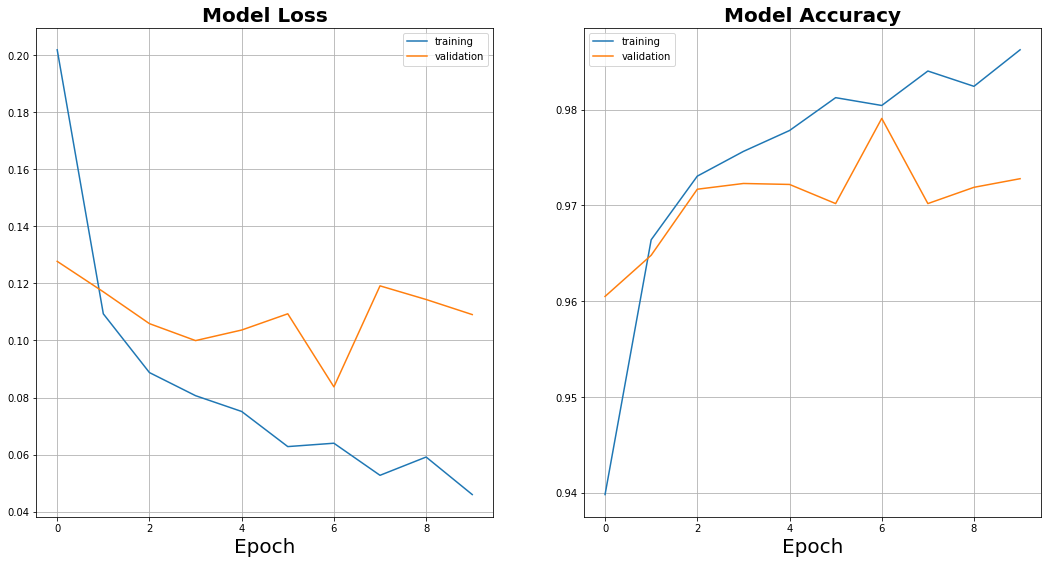

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 9))
axes[0].plot(hist2.history['loss'], label='training')
axes[0].plot(hist2.history['val_loss'], label='validation')
axes[0].legend()
axes[0].grid()
axes[0].set_xlabel('Epoch', fontdict={'size': 20})
axes[0].set_title('Model Loss', fontdict={'weight': 'bold', 'size': 20})
axes[1].plot(hist2.history['acc'], label='training')
axes[1].plot(hist2.history['val_acc'], label='validation')
axes[1].legend()
axes[1].grid()
axes[1].set_xlabel('Epoch', fontdict={'size': 20})
axes[1].set_title('Model Accuracy', fontdict={'weight': 'bold', 'size': 20})

# model 3

In [ ]:
args = {'f1': 64, 'f2': 64, 'f3': 128, 'fc': 128, 'k1': (5,5), 'k2': (5,5), 'k3': (3,3), 's': (2, 2), 'p': 'valid'}
model3 = create_model(**args)
model3.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
hist3= model2.fit(x=x_train_normalized, y=y_train, batch_size=50, epochs=10, validation_data=(x_test_normalized, y_test))

Epoch 1/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0462 - acc: 0.9868 - val_loss: 0.1847 - val_acc: 0.9652
Epoch 2/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0562 - acc: 0.9844 - val_loss: 0.1351 - val_acc: 0.9727
Epoch 3/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0396 - acc: 0.9884 - val_loss: 0.1513 - val_acc: 0.9720
Epoch 4/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0452 - acc: 0.9877 - val_loss: 0.2263 - val_acc: 0.9597
Epoch 5/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0574 - acc: 0.9857 - val_loss: 0.1718 - val_acc: 0.9724
Epoch 6/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0385 - acc: 0.9898 - val_loss: 0.1374 - val_acc: 0.9742
Epoch 7/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0426 - acc: 0.9888 - val_loss: 0.1749 - val_acc: 0.9728
Epoch 8/10
1200/1200 [==============================] - 5s 4ms

Text(0.5, 1.0, 'Model Accuracy')

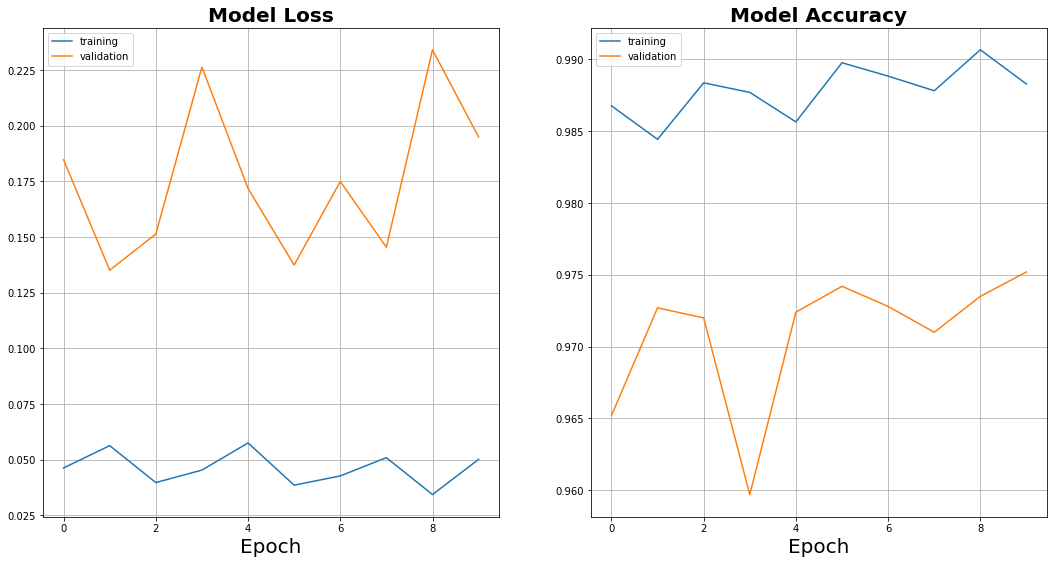

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 9))
axes[0].plot(hist3.history['loss'], label='training')
axes[0].plot(hist3.history['val_loss'], label='validation')
axes[0].legend()
axes[0].grid()
axes[0].set_xlabel('Epoch', fontdict={'size': 20})
axes[0].set_title('Model Loss', fontdict={'weight': 'bold', 'size': 20})
axes[1].plot(hist3.history['acc'], label='training')
axes[1].plot(hist3.history['val_acc'], label='validation')
axes[1].legend()
axes[1].grid()
axes[1].set_xlabel('Epoch', fontdict={'size': 20})
axes[1].set_title('Model Accuracy', fontdict={'weight': 'bold', 'size': 20})

# model 4

In [ ]:
args = {'f1': 64, 'f2': 128, 'f3': 256, 'fc': 256, 'k1': (3,3), 'k2': (3,3), 'k3': (3,3), 's': (1, 1), 'p': 'same'}
model4 = create_model(**args)
model4.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
hist4 = model1.fit(x=x_train_normalized, y=y_train, batch_size=50, epochs=10, validation_data=(x_test_normalized, y_test))

Epoch 1/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0367 - acc: 0.9891 - val_loss: 0.0971 - val_acc: 0.9768
Epoch 2/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0326 - acc: 0.9898 - val_loss: 0.1203 - val_acc: 0.9746
Epoch 3/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0319 - acc: 0.9908 - val_loss: 0.1281 - val_acc: 0.9725
Epoch 4/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0284 - acc: 0.9918 - val_loss: 0.1864 - val_acc: 0.9748
Epoch 5/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0410 - acc: 0.9893 - val_loss: 0.1168 - val_acc: 0.9784
Epoch 6/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0230 - acc: 0.9936 - val_loss: 0.1374 - val_acc: 0.9774
Epoch 7/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0361 - acc: 0.9904 - val_loss: 0.1393 - val_acc: 0.9755
Epoch 8/10
1200/1200 [==============================] - 5s 4ms

Text(0.5, 1.0, 'Model Accuracy')

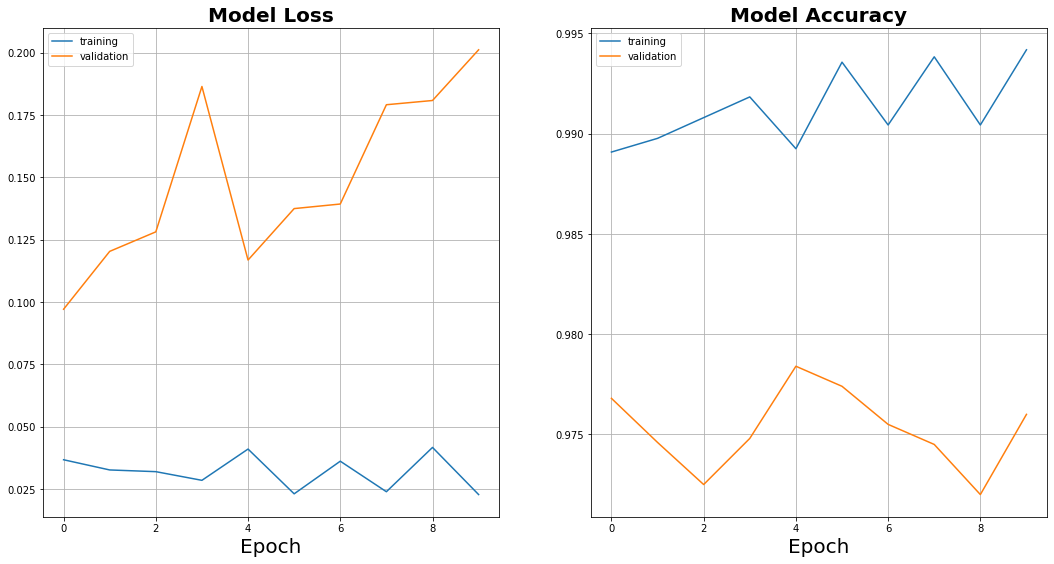

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 9))
axes[0].plot(hist4.history['loss'], label='training')
axes[0].plot(hist4.history['val_loss'], label='validation')
axes[0].legend()
axes[0].grid()
axes[0].set_xlabel('Epoch', fontdict={'size': 20})
axes[0].set_title('Model Loss', fontdict={'weight': 'bold', 'size': 20})
axes[1].plot(hist4.history['acc'], label='training')
axes[1].plot(hist4.history['val_acc'], label='validation')
axes[1].legend()
axes[1].grid()
axes[1].set_xlabel('Epoch', fontdict={'size': 20})
axes[1].set_title('Model Accuracy', fontdict={'weight': 'bold', 'size': 20})

# model 5

In [ ]:
args = {'f1': 128, 'f2': 128, 'f3': 128, 'fc': 512, 'k1': (3,3), 'k2': (3,3), 'k3': (3,3), 's': (1, 1), 'p': 'same'}
model5 = create_model(**args)
model5.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
hist5 = model5.fit(x=x_train_normalized, y=y_train, batch_size=50, epochs=10, validation_data=(x_test_normalized, y_test))

Epoch 1/10
1200/1200 [==============================] - 95s 78ms/step - loss: 0.5214 - acc: 0.9245 - val_loss: 0.1516 - val_acc: 0.9565
Epoch 2/10
1200/1200 [==============================] - 95s 79ms/step - loss: 0.1163 - acc: 0.9646 - val_loss: 0.1320 - val_acc: 0.9633
Epoch 3/10
1200/1200 [==============================] - 96s 80ms/step - loss: 0.1143 - acc: 0.9657 - val_loss: 0.1242 - val_acc: 0.9645
Epoch 4/10
1200/1200 [==============================] - 95s 79ms/step - loss: 4.6839 - acc: 0.9375 - val_loss: 0.4713 - val_acc: 0.9235
Epoch 5/10
1200/1200 [==============================] - 95s 79ms/step - loss: 0.2274 - acc: 0.9532 - val_loss: 0.2765 - val_acc: 0.9599
Epoch 6/10
1200/1200 [==============================] - 94s 78ms/step - loss: 0.1422 - acc: 0.9661 - val_loss: 0.2575 - val_acc: 0.9589
Epoch 7/10
1200/1200 [==============================] - 94s 78ms/step - loss: 0.1199 - acc: 0.9717 - val_loss: 0.2343 - val_acc: 0.9608
Epoch 8/10
1200/1200 [==========================

Text(0.5, 1.0, 'Model Accuracy')

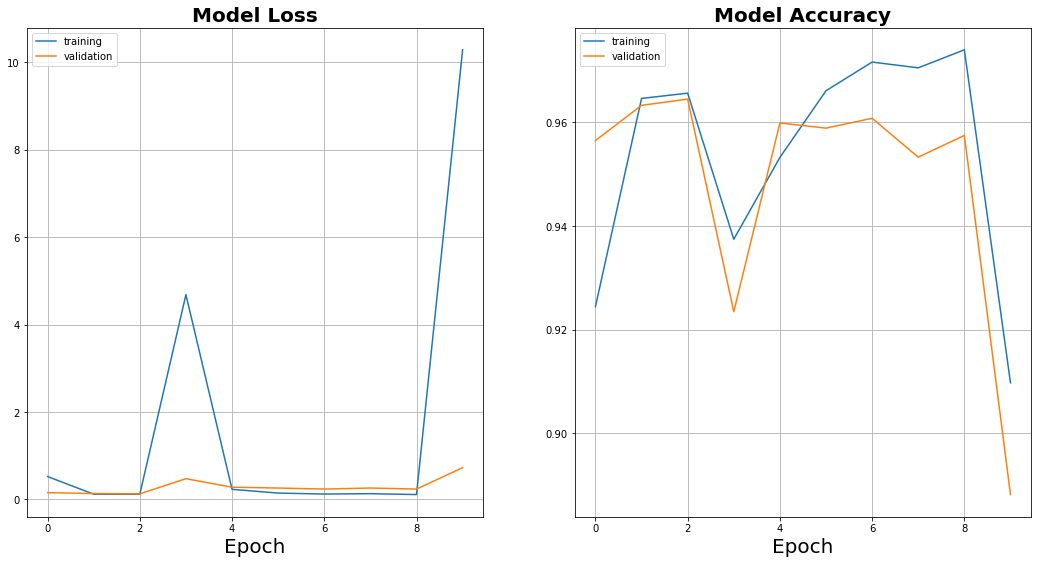

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 9))
axes[0].plot(hist5.history['loss'], label='training')
axes[0].plot(hist5.history['val_loss'], label='validation')
axes[0].legend()
axes[0].grid()
axes[0].set_xlabel('Epoch', fontdict={'size': 20})
axes[0].set_title('Model Loss', fontdict={'weight': 'bold', 'size': 20})
axes[1].plot(hist5.history['acc'], label='training')
axes[1].plot(hist5.history['val_acc'], label='validation')
axes[1].legend()
axes[1].grid()
axes[1].set_xlabel('Epoch', fontdict={'size': 20})
axes[1].set_title('Model Accuracy', fontdict={'weight': 'bold', 'size': 20})

In [ ]:
#define data augmentation
data_augmentation = tf.keras.Sequential([
  layers.RandomRotation(0.1),
  layers.RandomTranslation(0.2, 0.2),
  layers.RandomZoom(.2)
])


In [ ]:
augmented = data_augmentation(x_train_normalized).numpy()
x_train_augmented = np.vstack([augmented, x_train_normalized])
y_train_augmented = np.hstack([y_train, y_train])

# model 2 with Data Augmentation

In [ ]:
#model with augmented data
args = {'f1': 64, 'f2': 64, 'f3': 128, 'fc': 128, 'k1': (5,5), 'k2': (3,3), 'k3': (3,3), 's': (2, 2), 'p': 'valid'}
model6 = create_model(**args)
model6.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
hist6 = model6.fit(x=x_train_augmented, y=y_train_augmented, batch_size=50, epochs=10, validation_data=(x_test_normalized, y_test))

Epoch 1/10
2400/2400 [==============================] - 138s 57ms/step - loss: 0.7048 - acc: 0.7833 - val_loss: 0.1445 - val_acc: 0.9566
Epoch 2/10
2400/2400 [==============================] - 139s 58ms/step - loss: 0.4834 - acc: 0.8536 - val_loss: 0.1254 - val_acc: 0.9676
Epoch 3/10
2400/2400 [==============================] - 154s 64ms/step - loss: 0.4200 - acc: 0.8722 - val_loss: 0.1115 - val_acc: 0.9673
Epoch 4/10
2400/2400 [==============================] - 154s 64ms/step - loss: 0.3881 - acc: 0.8823 - val_loss: 0.1229 - val_acc: 0.9625
Epoch 5/10
2400/2400 [==============================] - 153s 64ms/step - loss: 0.3666 - acc: 0.8889 - val_loss: 0.0876 - val_acc: 0.9712
Epoch 6/10
2400/2400 [==============================] - 156s 65ms/step - loss: 0.3485 - acc: 0.8933 - val_loss: 0.1002 - val_acc: 0.9671
Epoch 7/10
2400/2400 [==============================] - 155s 65ms/step - loss: 0.3342 - acc: 0.8980 - val_loss: 0.1097 - val_acc: 0.9662
Epoch 8/10
2400/2400 [===================

Text(0.5, 1.0, 'Model Accuracy')

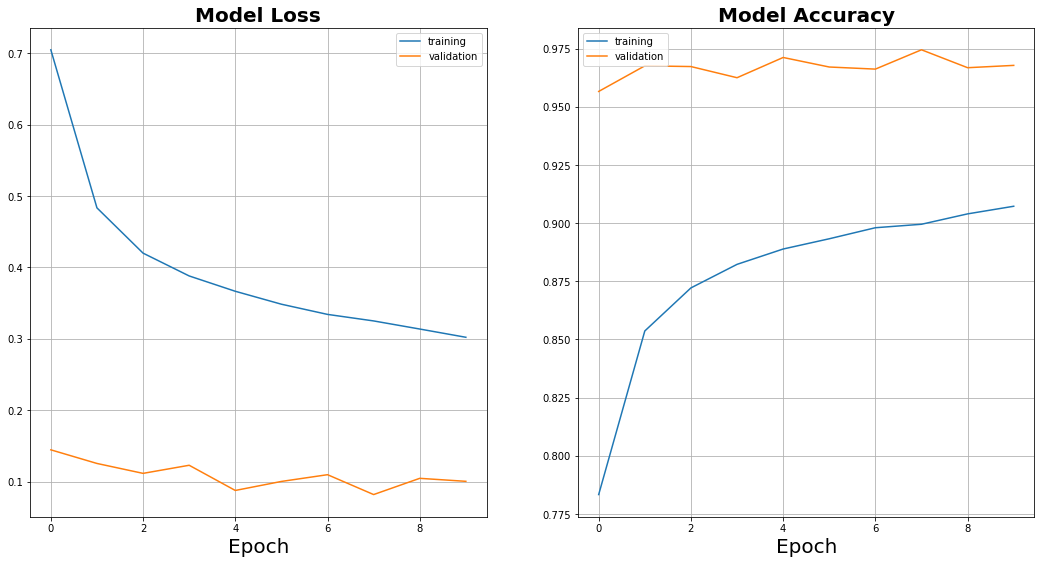

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 9))
axes[0].plot(hist6.history['loss'], label='training')
axes[0].plot(hist6.history['val_loss'], label='validation')
axes[0].legend()
axes[0].grid()
axes[0].set_xlabel('Epoch', fontdict={'size': 20})
axes[0].set_title('Model Loss', fontdict={'weight': 'bold', 'size': 20})
axes[1].plot(hist6.history['acc'], label='training')
axes[1].plot(hist6.history['val_acc'], label='validation')
axes[1].legend()
axes[1].grid()
axes[1].set_xlabel('Epoch', fontdict={'size': 20})
axes[1].set_title('Model Accuracy', fontdict={'weight': 'bold', 'size': 20})

### ResNet 50

In [ ]:
def identity_block(X, f, filters, stage, block):
    
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    F1, F2, F3 = filters
    
    X_shortcut = X
        
    X = layers.Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = tf.keras.initializers.glorot_uniform(seed=0))(X)
    X = layers.BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = layers.Activation('relu')(X)
        
    X = layers.Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = tf.keras.initializers.glorot_uniform(seed=0))(X)
    X = layers.BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = layers.Activation('relu')(X)

    X = layers.Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = tf.keras.initializers.glorot_uniform(seed=0))(X)
    X = layers.BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    X = layers.Add()([X_shortcut, X])
    X = layers.Activation('relu')(X)
        
    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s = 2):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters
    X_shortcut = X
    X = layers.Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = tf.keras.initializers.glorot_uniform(seed=0))(X)
    X = layers.BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = layers.Activation('relu')(X)
    X = layers.Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = tf.keras.initializers.glorot_uniform(seed=0))(X)
    X = layers.BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = layers.Activation('relu')(X)
    X = layers.Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = tf.keras.initializers.glorot_uniform(seed=0))(X)
    X = layers.BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)
    X_shortcut = layers.Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1', kernel_initializer = tf.keras.initializers.glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = layers.BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)
    X = layers.Add()([X_shortcut, X])
    X = layers.Activation('relu')(X)
   
    return X


In [ ]:
def ResNet50(input_shape = (48, 48, 1), classes = 10):
    X_input = layers.Input(input_shape)
    X = layers.ZeroPadding2D((3, 3))(X_input)
    X = layers.Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = tf.keras.initializers.glorot_uniform(seed=0))(X)
    X = layers.BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = layers.Activation('relu')(X)
    X = layers.MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')
    X = layers.AveragePooling2D(pool_size=(2, 2),name='avg_pool')(X)
    X = layers.Flatten()(X  )
    X = layers.Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = tf.keras.initializers.glorot_uniform(seed=0))(X)
    model = tf.keras.models.Model(inputs = X_input, outputs = X, name='ResNet50')
    return model

In [ ]:
model = ResNet50(input_shape=(48, 48, 1), classes=10)

## Base Training (without prepared Weights)

In [ ]:
#train resnet50 from scratch
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
hist7= model.fit(x=x_train_normalized, y=y_train, batch_size=50, epochs=10, validation_data=(x_test_normalized, y_test))

Epoch 1/10
1200/1200 [==============================] - 96s 66ms/step - loss: 0.2157 - acc: 0.9415 - val_loss: 0.1223 - val_acc: 0.9701
Epoch 2/10
1200/1200 [==============================] - 76s 63ms/step - loss: 0.0719 - acc: 0.9806 - val_loss: 0.0374 - val_acc: 0.9897
Epoch 3/10
1200/1200 [==============================] - 76s 63ms/step - loss: 0.1570 - acc: 0.9661 - val_loss: 5.3509 - val_acc: 0.8994
Epoch 4/10
1200/1200 [==============================] - 74s 62ms/step - loss: 0.0701 - acc: 0.9799 - val_loss: 0.0415 - val_acc: 0.9882
Epoch 5/10
1200/1200 [==============================] - 76s 63ms/step - loss: 0.0462 - acc: 0.9861 - val_loss: 0.0354 - val_acc: 0.9882
Epoch 6/10
1200/1200 [==============================] - 76s 63ms/step - loss: 0.0369 - acc: 0.9887 - val_loss: 0.0391 - val_acc: 0.9868
Epoch 7/10
1200/1200 [==============================] - 74s 62ms/step - loss: 0.0969 - acc: 0.9768 - val_loss: 0.0328 - val_acc: 0.9891
Epoch 8/10
1200/1200 [==========================

Text(0.5, 1.0, 'Model Accuracy')

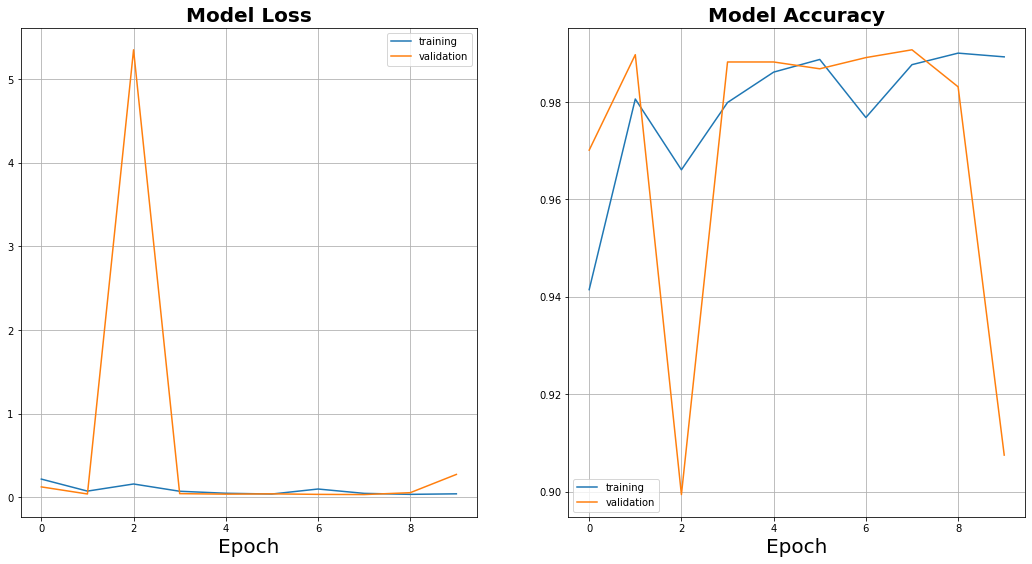

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 9))
axes[0].plot(hist7.history['loss'], label='training')
axes[0].plot(hist7.history['val_loss'], label='validation')
axes[0].legend()
axes[0].grid()
axes[0].set_xlabel('Epoch', fontdict={'size': 20})
axes[0].set_title('Model Loss', fontdict={'weight': 'bold', 'size': 20})
axes[1].plot(hist7.history['acc'], label='training')
axes[1].plot(hist7.history['val_acc'], label='validation')
axes[1].legend()
axes[1].grid()
axes[1].set_xlabel('Epoch', fontdict={'size': 20})
axes[1].set_title('Model Accuracy', fontdict={'weight': 'bold', 'size': 20})

## Transfer Learning

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
baseModel = ResNet50(weights="imagenet", include_top=False, input_tensor=layers.Input(shape=(224, 224, 3)))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
headModel = baseModel.output
headModel = layers.AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = layers.Flatten(name="flatten")(headModel)
headModel = layers.Dense(256, activation="relu")(headModel)
headModel = layers.Dropout(0.5)(headModel)
headModel = layers.Dense(10, activation="softmax")(headModel)
model_fin = tf.keras.models.Model(inputs=baseModel.input, outputs=headModel)

In [ ]:
#fine-tune pre-trained model
model_fin.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
hist8= model.fit(x=x_train_normalized, y=y_train, batch_size=50, epochs=10, validation_data=(x_test_normalized, y_test))

Epoch 1/10
1200/1200 [==============================] - 74s 62ms/step - loss: 0.0489 - acc: 0.9862 - val_loss: 0.0325 - val_acc: 0.9905
Epoch 2/10
1200/1200 [==============================] - 76s 64ms/step - loss: 0.0323 - acc: 0.9899 - val_loss: 0.0565 - val_acc: 0.9831
Epoch 3/10
1200/1200 [==============================] - 76s 64ms/step - loss: 0.0273 - acc: 0.9925 - val_loss: 0.0360 - val_acc: 0.9895
Epoch 4/10
1200/1200 [==============================] - 75s 62ms/step - loss: 0.0189 - acc: 0.9940 - val_loss: 0.0208 - val_acc: 0.9933
Epoch 5/10
1200/1200 [==============================] - 76s 63ms/step - loss: 0.0188 - acc: 0.9940 - val_loss: 0.0228 - val_acc: 0.9929
Epoch 6/10
1200/1200 [==============================] - 74s 61ms/step - loss: 0.0321 - acc: 0.9917 - val_loss: 0.0286 - val_acc: 0.9924
Epoch 7/10
1200/1200 [==============================] - 75s 62ms/step - loss: 0.0160 - acc: 0.9948 - val_loss: 0.0191 - val_acc: 0.9933
Epoch 8/10
1200/1200 [==========================

Text(0.5, 1.0, 'Model Accuracy')

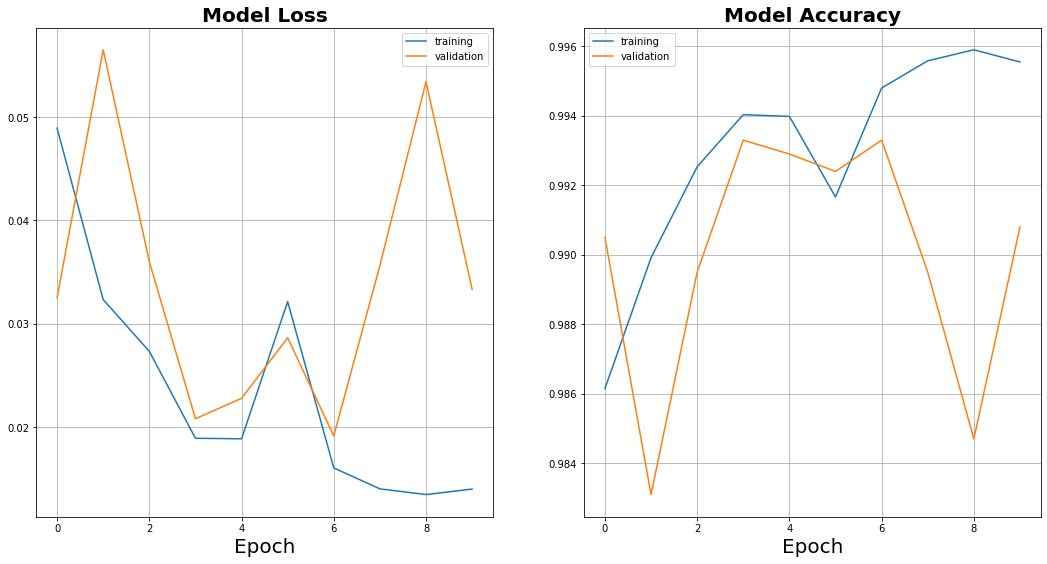

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 9))
axes[0].plot(hist8.history['loss'], label='training')
axes[0].plot(hist8.history['val_loss'], label='validation')
axes[0].legend()
axes[0].grid()
axes[0].set_xlabel('Epoch', fontdict={'size': 20})
axes[0].set_title('Model Loss', fontdict={'weight': 'bold', 'size': 20})
axes[1].plot(hist8.history['acc'], label='training')
axes[1].plot(hist8.history['val_acc'], label='validation')
axes[1].legend()
axes[1].grid()
axes[1].set_xlabel('Epoch', fontdict={'size': 20})
axes[1].set_title('Model Accuracy', fontdict={'weight': 'bold', 'size': 20})